<a href="https://www.kaggle.com/code/rashikaaagupta/ice-cube?scriptVersionId=129692841" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icecube-neutrinos-in-deep-ice/train_meta.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/sample_submission.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/test_meta.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/sensor_geometry.csv
/kaggle/input/icecube-neutrinos-in-deep-ice/test/batch_661.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_240.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_295.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_158.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_35.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_145.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_476.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_449.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_104.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_419.parquet
/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_136.par

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import plotly.express as px
import numpy as np
import pandas as pd
import os
import seaborn as sns

There are batches of datasets 
and train_meta.parquet, test_meta ans sensor geometry.
Let's explore these.
### exploring the sensor geometry 

In [3]:
sensor_geo = pd.read_csv('/kaggle/input/icecube-neutrinos-in-deep-ice/sensor_geometry.csv')

In [4]:
sensor_geo.describe()

,sensor_id,x,y,z
count,5160.000000,5160.000000,5160.000000,5160.000000
mean,2579.500000,5.870829,-2.518609,-23.905766
std,1489.708025,285.151213,269.409729,296.456563
min,0.000000,-570.900000,-521.080000,-512.820000
25%,1289.750000,-224.090000,-209.070000,-283.200000
50%,2579.500000,16.990000,-6.055000,-35.115000
75%,3869.250000,224.580000,211.660000,228.557500
max,5159.000000,576.370000,509.500000,524.560000


There are 
* 5160 sensors
* across x = 576 to x = - 570, y = -521 to + 509, z = -512 to +524

In [5]:
sensor_geo

,sensor_id,x,y,z
0,0,-256.14,-521.08,496.03
1,1,-256.14,-521.08,479.01
2,2,-256.14,-521.08,461.99
3,3,-256.14,-521.08,444.97
4,4,-256.14,-521.08,427.95
...,...,...,...,...
5155,5155,-10.97,6.72,-472.39
5156,5156,-10.97,6.72,-479.39
5157,5157,-10.97,6.72,-486.40
5158,5158,-10.97,6.72,-493.41


In [6]:
print(sensor_geo.nunique())

sensor_id    5160
x             118
y             117
z            4975
dtype: int64


* Seems to be spread acorss x and y but along the z axis 

In [7]:
sensor_geo.head()

,sensor_id,x,y,z
0,0,-256.14,-521.08,496.03
1,1,-256.14,-521.08,479.01
2,2,-256.14,-521.08,461.99
3,3,-256.14,-521.08,444.97
4,4,-256.14,-521.08,427.95


In [8]:
fig = px.scatter_3d(x = sensor_geo['x'], y = sensor_geo['y'], z = sensor_geo['z'],color = sensor_geo['z'], opacity=0.5)# mode = 'markers',

fig.update_traces(marker_size=2)
fig.show()

Shows where the sensors arew placed 

Loading the dataset and looking how they look

In [9]:
train_meta = pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/train_meta.parquet')

each batch has 200000 values

There are 660 batches

There is train_meta which has information about the batch_id, event_id, first_pulse, last_pulse, azimuth, zenith angles
bath_ids 0->660
There are 200,000 of each. With each of these batches we see first_pulse_index = last_pulse+1

In [10]:
train_meta.head()

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
0,1,24,0,60,5.029555,2.087498
1,1,41,61,111,0.417742,1.549686
2,1,59,112,147,1.160466,2.401942
3,1,67,148,289,5.845952,0.759054
4,1,72,290,351,0.653719,0.939117


In [11]:
batch_1 = pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_1.parquet')

In [12]:
batch_1.head()

,sensor_id,time,charge,auxiliary
event_id,,,,
24,3918,5928,1.325,True
24,4157,6115,1.175,True
24,3520,6492,0.925,True
24,5041,6665,0.225,True
24,2948,8054,1.575,True


In [13]:
batch_1.tail()

,sensor_id,time,charge,auxiliary
event_id,,,,
3266196,1961,17617,0.975,True
3266196,36,17705,0.625,True
3266196,356,18192,0.725,True
3266196,2826,18609,0.575,True
3266196,5013,18741,1.375,True


Let's compare the batch_! dataset with the meta dataset that has batch id of 1

All the event ids from meta atleast for batch 1 is unique. 

In [14]:
batch_2 = pd.read_parquet('/kaggle/input/icecube-neutrinos-in-deep-ice/train/batch_2.parquet')

In [15]:
batch_2.head()

,sensor_id,time,charge,auxiliary
event_id,,,,
3266199,208,6003,0.425,True
3266199,316,6086,1.275,True
3266199,1889,6811,1.175,True
3266199,2724,6816,1.025,True
3266199,1628,6966,1.225,True


In [16]:
batch_2.tail()

,sensor_id,time,charge,auxiliary
event_id,,,,
6517807,2284,17879,0.525,True
6517807,4752,18217,0.975,True
6517807,4918,18305,0.675,True
6517807,4918,18318,0.675,True
6517807,555,18357,1.175,True


let's look at the batch number 1 specific information from the train set

In [17]:
batch1FromTrain = train_meta[train_meta['batch_id'] == 1]

In [18]:
batch1FromTrain.head()

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith
0,1,24,0,60,5.029555,2.087498
1,1,41,61,111,0.417742,1.549686
2,1,59,112,147,1.160466,2.401942
3,1,67,148,289,5.845952,0.759054
4,1,72,290,351,0.653719,0.939117


Each training dataset has batches and events information and each batch df has sensor id information, 

In [19]:
batch_1.loc[24]

,sensor_id,time,charge,auxiliary
event_id,,,,
24,3918,5928,1.325,True
24,4157,6115,1.175,True
24,3520,6492,0.925,True
24,5041,6665,0.225,True
24,2948,8054,1.575,True
...,...,...,...,...
24,3452,17812,0.725,True
24,48,18053,0.975,True
24,3267,18095,1.125,True


we see that the event id 24 gives 61 rows which is same as the lastpulse index - first  plulse index. 
for every pulse we get the time when it happens, charge deposition, and sensor_id information that is the detector triggered.

Let's add this information on the training data

In [20]:
batch1FromTrain['nTimes']  = batch1FromTrain['last_pulse_index'] - batch1FromTrain['first_pulse_index'] + 1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
batch1FromTrain.head()

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith,nTimes
0,1,24,0,60,5.029555,2.087498,61
1,1,41,61,111,0.417742,1.549686,51
2,1,59,112,147,1.160466,2.401942,36
3,1,67,148,289,5.845952,0.759054,142
4,1,72,290,351,0.653719,0.939117,62


In [22]:
batch1FromTrain.nTimes.value_counts()

47       3829
50       3801
48       3797
49       3793
46       3778
         ... 
92820       1
76341       1
11335       1
4673        1
3321        1
Name: nTimes, Length: 2797, dtype: int64

it seems for batch 1 the max nTimes is 47 

In [23]:
batch1FromTrain[batch1FromTrain['nTimes'] == 47]

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith,nTimes
105,1,1676,17950,17996,5.868945,1.729952,47
209,1,3401,43185,43231,2.976005,2.044129,47
228,1,3801,45104,45150,2.555956,1.236129,47
239,1,3953,45812,45858,5.074245,2.177710,47
264,1,4404,47315,47361,4.836330,0.730326,47
...,...,...,...,...,...,...,...
199633,1,3260578,32650496,32650542,1.379772,2.774155,47
199710,1,3261586,32658350,32658396,2.642373,1.212656,47
199814,1,3263055,32734799,32734845,2.542519,0.543064,47
199849,1,3263742,32738666,32738712,5.431146,2.155081,47


let's randomly choose the 1st row i.e event id corresponding to 1676 
look at infomration from batch 1 

In [24]:
#resetiing index
batch_1.reset_index()

,event_id,sensor_id,time,charge,auxiliary
0,24,3918,5928,1.325,True
1,24,4157,6115,1.175,True
2,24,3520,6492,0.925,True
3,24,5041,6665,0.225,True
4,24,2948,8054,1.575,True
...,...,...,...,...,...
32792411,3266196,1961,17617,0.975,True
32792412,3266196,36,17705,0.625,True
32792413,3266196,356,18192,0.725,True
32792414,3266196,2826,18609,0.575,True


In [25]:
#batch_1.loc[1676]
#there should be 47 rows, givinh information of what sensors are triggered. 
# there positions and angles it makes

In [26]:
#merging the dataframes


<AxesSubplot:xlabel='sensor_id', ylabel='Count'>

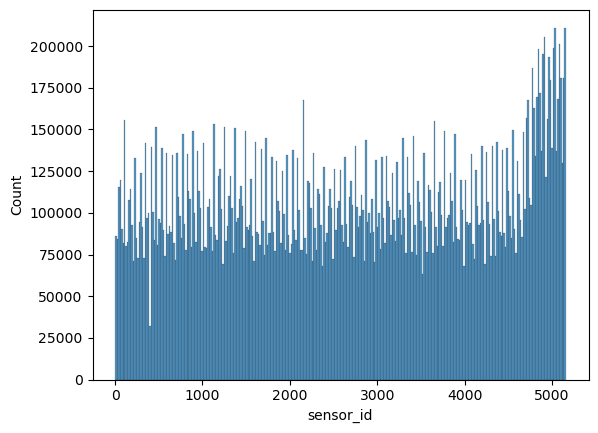

In [27]:
sns.histplot(batch_1['sensor_id'])

we observe that various sensor ids are

for a particular batch let's look at the event id and what could it possibly mean

There are batch ids mentioned in the train_meta that are
* 660 batch ids
    * these batch id have event ids and, first_pulse_index and last_pulse_index for a specific event
    * Frequency  of event_id in a fixed batch is same as first_pulse_index - last_pulse_index
    * These event_id stores  the information of all the sensor numbers that were triggered, at time t and deposits charge e

We have
* train_meta -> batches, the angle with it enters for an event
* batch_n -> contains all the sensor number that gets triggered with increasing time and, charge deposited
* sensor_geometry -> sensors id and where they are located

In [28]:
train_meta['nTimes'] = (train_meta.last_pulse_index - train_meta.first_pulse_index) +1

In [29]:
train_meta.head()

,batch_id,event_id,first_pulse_index,last_pulse_index,azimuth,zenith,nTimes
0,1,24,0,60,5.029555,2.087498,61
1,1,41,61,111,0.417742,1.549686,51
2,1,59,112,147,1.160466,2.401942,36
3,1,67,148,289,5.845952,0.759054,142
4,1,72,290,351,0.653719,0.939117,62
